<a href="https://colab.research.google.com/github/Divya-Gajjar/Colab_repository/blob/master/food_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/train copy.csv')
test = pd.read_csv('/content/test_QoiMO9B.csv')
meal = pd.read_csv('/content/meal_info.csv')
center = pd.read_csv('/content/fulfilment_center_info.csv')

In [0]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [0]:
center.columns

Index(['center_id', 'city_code', 'region_code', 'center_type', 'op_area'], dtype='object')

In [0]:
result = pd.merge(df,
                 meal[['meal_id', 'category', 'cuisine']],
                 on='meal_id', 
                 how='left')

In [0]:
df = pd.merge(result,
                 center[['center_id', 'city_code', 'region_code', 'center_type', 'op_area']],
                 on='center_id', 
                 how='left')

In [0]:
result = pd.merge(test,
                 meal[['meal_id', 'category', 'cuisine']],
                 on='meal_id', 
                 how='left')

In [0]:
test = pd.merge(result,
                 center[['center_id', 'city_code', 'region_code', 'center_type', 'op_area']],
                 on='center_id', 
                 how='left')

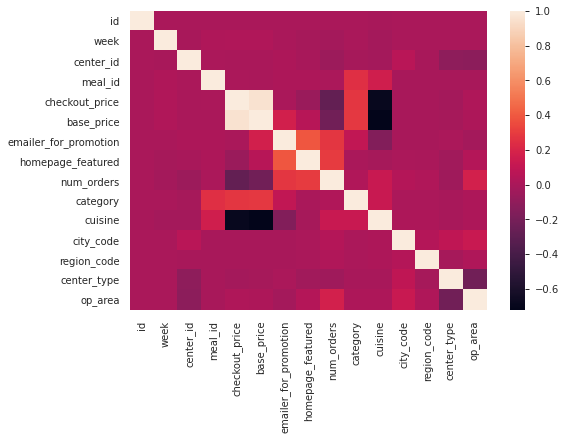

In [0]:
sn.heatmap(df.corr())


In [0]:
!pip install category_encoders

     |████████████████████████████████| 102kB 2.4MB/s 


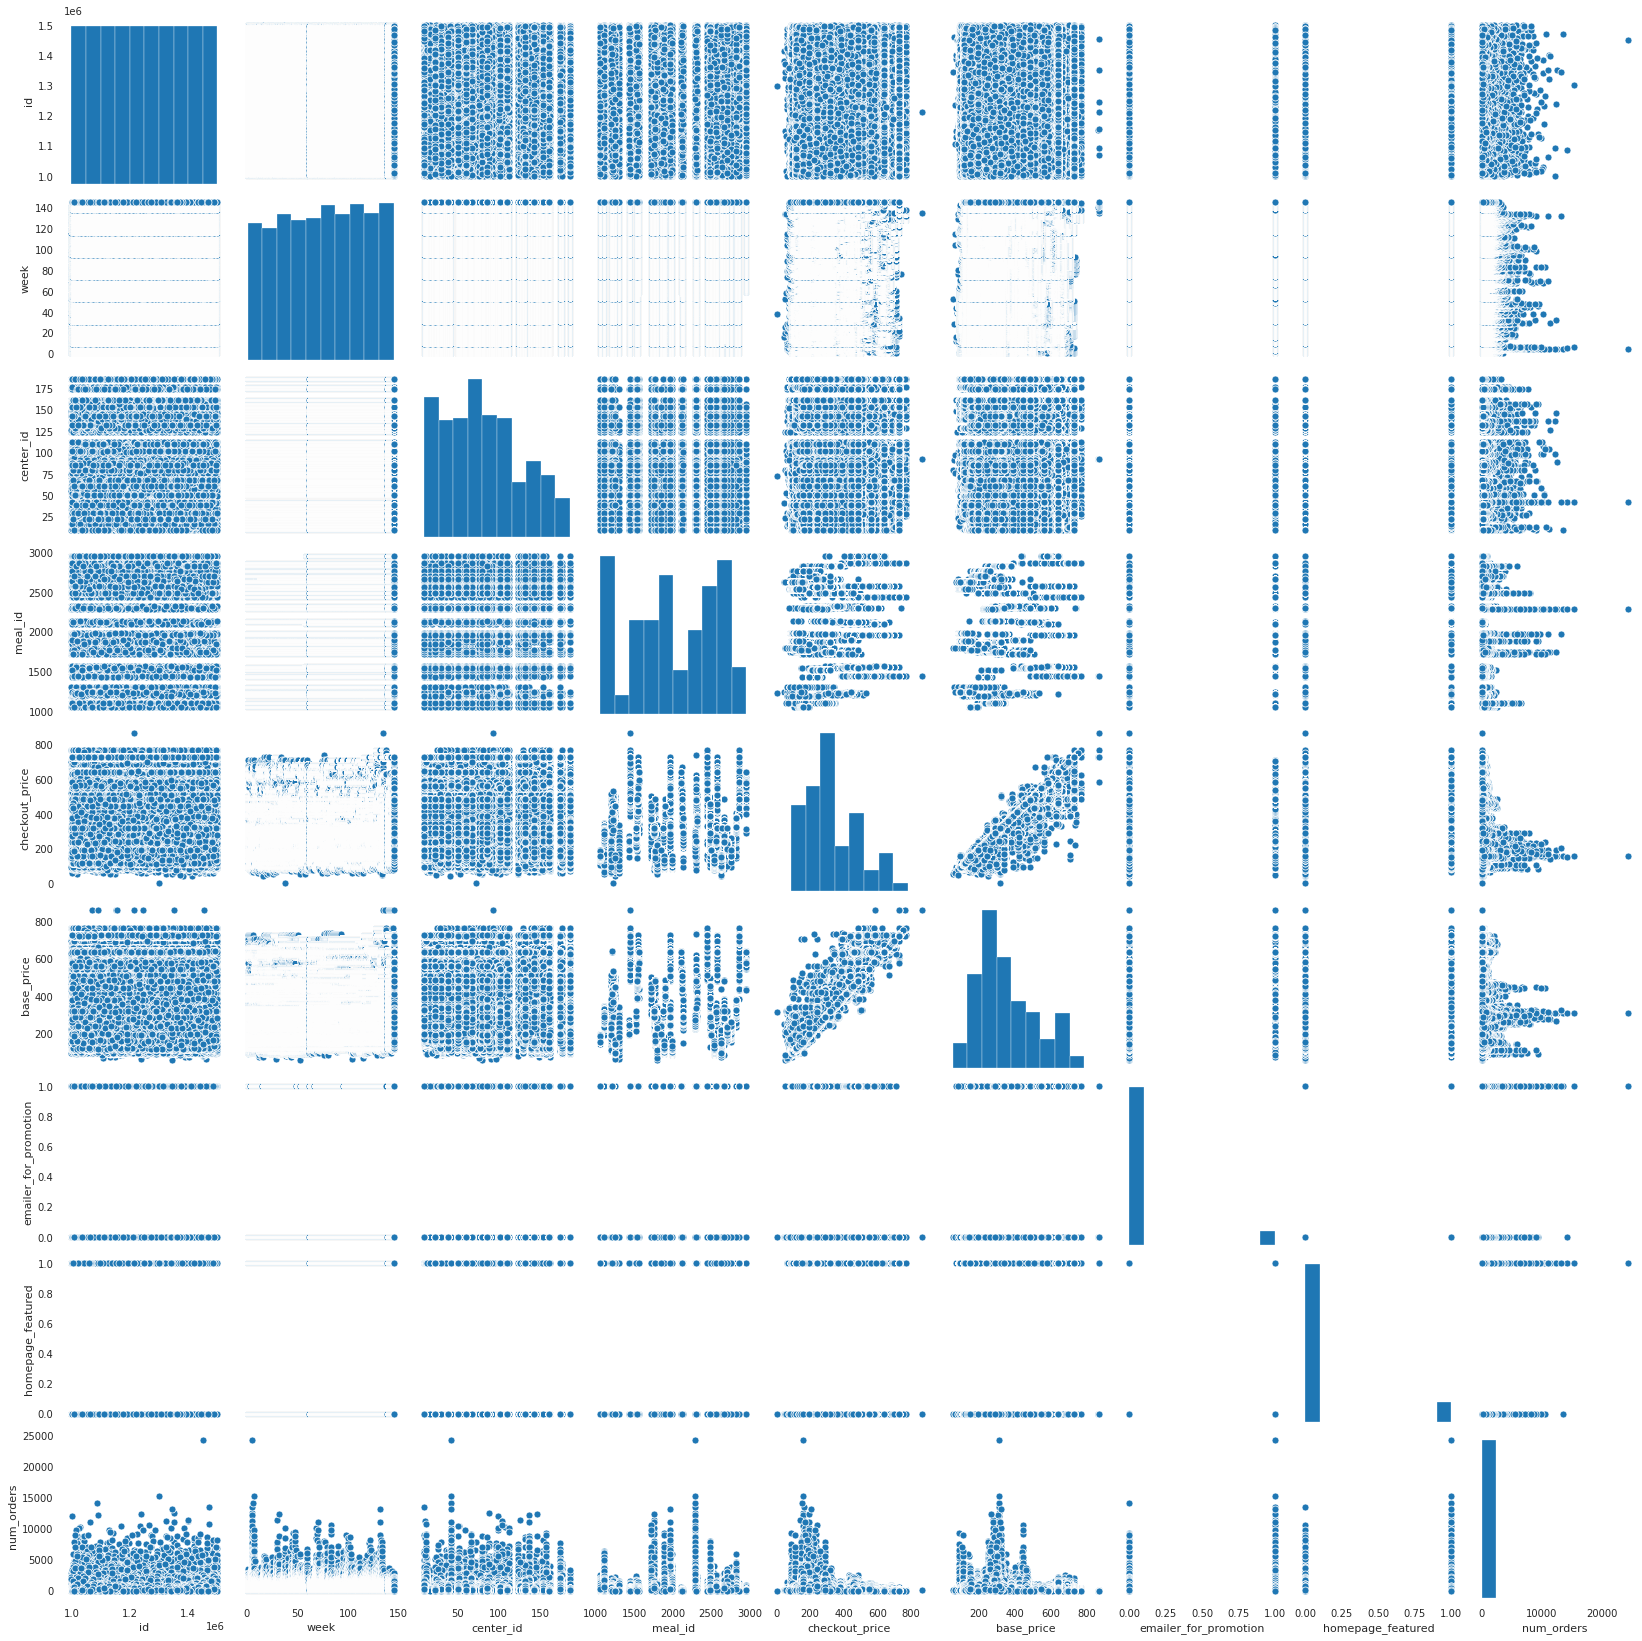

In [0]:
sn.pairplot(df)

(array([5.00000e+00, 1.17000e+03, 1.64780e+04, 3.72510e+04, 3.47110e+04,
        8.20930e+04, 1.20363e+05, 8.04790e+04, 5.65970e+04, 2.74000e+04]),
 array([4.01367666, 4.28872866, 4.56378065, 4.83883265, 5.11388465,
        5.38893665, 5.66398865, 5.93904064, 6.21409264, 6.48914464,
        6.76419664]),
 <a list of 10 Patch objects>)

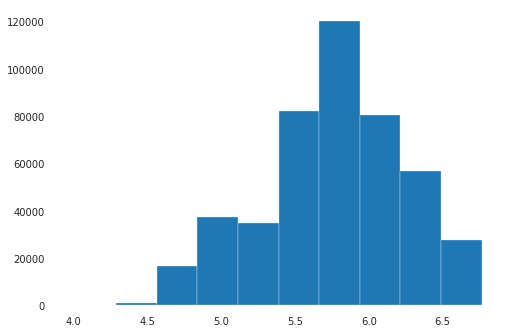

In [0]:
df['log_base_price']= np.log(df['base_price'])
plt.hist(df['log_base_price'])

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        2.85000e+02, 5.68070e+04, 1.15127e+05, 2.20950e+05, 6.33760e+04]),
 array([1.08856195, 1.65612542, 2.22368889, 2.79125236, 3.35881583,
        3.9263793 , 4.49394276, 5.06150623, 5.6290697 , 6.19663317,
        6.76419664]),
 <a list of 10 Patch objects>)

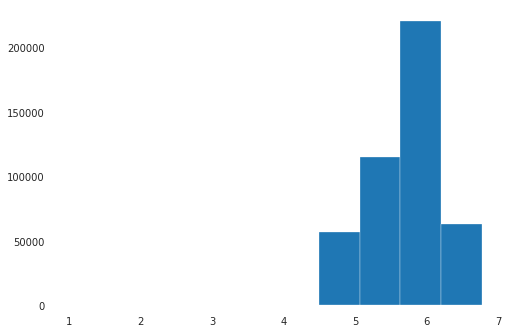

In [0]:
df['log_checkout_price']= np.log(df['checkout_price'])
plt.hist(df['log_checkout_price'])

(array([5.9880e+04, 6.8305e+04, 9.0283e+04, 9.6658e+04, 8.8599e+04,
        4.0997e+04, 9.9930e+03, 1.6140e+03, 2.1000e+02, 9.0000e+00]),
 array([ 2.56494936,  3.31827347,  4.07159758,  4.82492169,  5.5782458 ,
         6.33156992,  7.08489403,  7.83821814,  8.59154225,  9.34486636,
        10.09819048]),
 <a list of 10 Patch objects>)

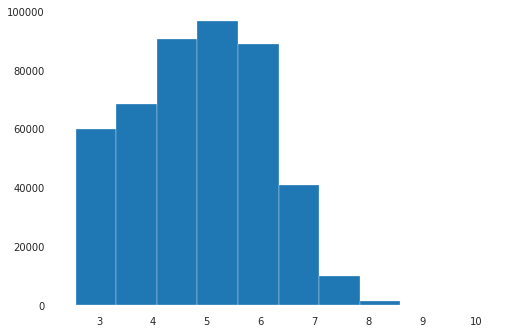

In [0]:
df['log_num_orders']= np.log(df['num_orders'])
plt.hist(df['log_num_orders'])

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['category'] = le.fit_transform(df['category'])
df['cuisine'] = le.fit_transform(df['cuisine'])
df['center_type'] = le.fit_transform(df['center_type'])

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
test['category'] = le.fit_transform(test['category'])
test['cuisine'] = le.fit_transform(test['cuisine'])
test['center_type'] = le.fit_transform(test['center_type'])

In [0]:
import category_encoders as ce
# create an object of the OneHotEncoder
OHE = ce.OneHotEncoder(cols=['category','cuisine','center_type'],use_cat_names=True)
# encode the categorical variables
df = OHE.fit_transform(df)
test = OHE.fit_transform(test)


In [0]:
import category_encoders as ce
# create an object of the OneHotEncoder
OHE = ce.OneHotEncoder(cols=['category','cuisine','center_type'],use_cat_names=True)
# encode the categorical variables
test = OHE.fit_transform(test)
  

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456547 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [0]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456547 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 41.8+ MB


In [0]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [0]:
test.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
count,3.257300e+04,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000
mean,1.248476e+06,150.477819,81.901728,2032.067909,341.854440,356.493615,0.066435,0.081356
std,1.441580e+05,2.864072,45.950455,547.199004,153.893886,155.150101,0.249045,0.273385
min,1.000085e+06,146.000000,10.000000,1062.000000,67.900000,89.240000,0.000000,0.000000
25%,1.123969e+06,148.000000,43.000000,1558.000000,214.430000,243.500000,0.000000,0.000000
50%,1.247296e+06,150.000000,76.000000,1993.000000,320.130000,321.130000,0.000000,0.000000
75%,1.372971e+06,153.000000,110.000000,2569.000000,446.230000,455.930000,0.000000,0.000000
max,1.499996e+06,155.000000,186.000000,2956.000000,1113.620000,1112.620000,1.000000,1.000000


In [0]:
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders',
       'category_Beverages', 'category_Rice Bowl', 'category_Starters',
       'category_Pasta', 'category_Sandwich', 'category_Biryani',
       'category_Extras', 'category_Pizza', 'category_Seafood',
       'category_Other Snacks', 'category_Desert', 'category_Soup',
       'category_Salad', 'category_Fish', 'cuisine_Thai', 'cuisine_Indian',
       'cuisine_Italian', 'cuisine_Continental', 'city_code', 'region_code',
       'center_type_TYPE_C', 'center_type_TYPE_B', 'center_type_TYPE_A',
       'op_area', 'log_checkout_price', 'log_num_orders', 'log_base_price'],
      dtype='object')

In [0]:
print(test.isnull().sum())

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
category_Beverages       0
category_Rice Bowl       0
category_Starters        0
category_Sandwich        0
category_Extras          0
category_Pizza           0
category_Seafood         0
category_Other Snacks    0
category_Desert          0
category_Salad           0
category_Fish            0
category_Pasta           0
category_Biryani         0
category_Soup            0
cuisine_Thai             0
cuisine_Indian           0
cuisine_Italian          0
cuisine_Continental      0
city_code                0
region_code              0
center_type_TYPE_C       0
center_type_TYPE_B       0
center_type_TYPE_A       0
op_area                  0
dtype: int64


In [0]:
df = df.dropna()
print(df.isnull().sum())

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category_Beverages       0
category_Rice Bowl       0
category_Starters        0
category_Pasta           0
category_Sandwich        0
category_Biryani         0
category_Extras          0
category_Pizza           0
category_Seafood         0
category_Other Snacks    0
category_Desert          0
category_Soup            0
category_Salad           0
category_Fish            0
cuisine_Thai             0
cuisine_Indian           0
cuisine_Italian          0
cuisine_Continental      0
city_code                0
region_code              0
center_type_TYPE_C       0
center_type_TYPE_B       0
center_type_TYPE_A       0
op_area                  0
dtype: int64


In [0]:
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders',
       'category_Beverages', 'category_Rice Bowl', 'category_Starters',
       'category_Pasta', 'category_Sandwich', 'category_Biryani',
       'category_Extras', 'category_Pizza', 'category_Seafood',
       'category_Other Snacks', 'category_Desert', 'category_Soup',
       'category_Salad', 'category_Fish', 'cuisine_Thai', 'cuisine_Indian',
       'cuisine_Italian', 'cuisine_Continental', 'city_code', 'region_code',
       'center_type_TYPE_C', 'center_type_TYPE_B', 'center_type_TYPE_A',
       'op_area'],
      dtype='object')

In [0]:
x = df[['week','log_checkout_price', 'log_base_price',
       'emailer_for_promotion', 'homepage_featured','category_Beverages', 
        'category_Rice Bowl', 'category_Starters',
       'category_Pasta', 'category_Sandwich', 'category_Biryani',
       'category_Extras', 'category_Pizza', 'category_Seafood',
       'category_Other Snacks', 'category_Desert', 'category_Soup',
       'category_Salad', 'category_Fish', 'cuisine_Thai', 'cuisine_Indian',
       'cuisine_Italian', 'cuisine_Continental', 'city_code', 'region_code',
       'center_type_TYPE_C', 'center_type_TYPE_B', 'center_type_TYPE_A',
       'op_area']]
y = df[['log_num_orders']]

In [0]:
x=df[['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'category_Beverages', 'category_Rice Bowl', 'category_Starters',
       'category_Pasta', 'category_Sandwich', 'category_Biryani',
       'category_Extras', 'category_Pizza', 'category_Seafood',
       'category_Other Snacks', 'category_Desert', 'category_Soup',
       'category_Salad', 'category_Fish', 'cuisine_Thai', 'cuisine_Indian',
       'cuisine_Italian', 'cuisine_Continental', 'city_code', 'region_code',
       'center_type_TYPE_C', 'center_type_TYPE_B', 'center_type_TYPE_A',
       'op_area']]
y=df[['num_orders']]

In [0]:
  from sklearn.model_selection import train_test_split
  xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, shuffle = True)

In [0]:
x=df[['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']]
y=df[['num_orders']]

In [0]:
def Linear_reg():

  global LR_model, xtrain, xtest, ytrain, ytest
  from sklearn.model_selection import train_test_split
  xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, shuffle = True)

  from sklearn.linear_model import LinearRegression
  LR_model = LinearRegression().fit(xtrain, ytrain)

  print('\n\n*****Linear Regression*****\n')
  print("train score",LR_model.score(xtrain, ytrain),'\n')
  print("test score",LR_model.score(xtest, ytest),'\n')

  y_pred = LR_model.predict(xtest)

  from sklearn.metrics import mean_squared_error, r2_score
  mse = mean_squared_error(ytest, y_pred)
  rmse = np.sqrt(mse)  
  r2 = r2_score(ytest, y_pred)
  # printing values
  print('Root mean squared error: ', rmse)
  print('R2 score: ', r2)

  '''from sklearn.model_selection import cross_val_score
  cv = cross_val_score(LR_model,x,y,cv=10)
  print('\nCross validation of Random Forest:  ',cv.mean())'''

  return;


def decision_reg():

  global dec_r, xtrain, xtest, ytrain, ytest
  from sklearn.model_selection import train_test_split
  xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, shuffle = True)
  from sklearn.tree import DecisionTreeRegressor
  dec_r = DecisionTreeRegressor().fit(xtrain, ytrain)

  print('\n\n*****Decision tree Regression*****\n')
  print("train score",dec_r.score(xtrain, ytrain),'\n')
  print("test score",dec_r.score(xtest, ytest),'\n')

  y_pred = dec_r.predict(xtest)

  from sklearn.metrics import mean_squared_error, r2_score
  mse = mean_squared_error(ytest, y_pred)
  rmse = np.sqrt(mse)  
  r2 = r2_score(ytest, y_pred)
  # printing values
  print('Root mean squared error: ', rmse)
  print('R2 score: ', r2)

  '''from sklearn.model_selection import cross_val_score
  cv = cross_val_score(dec_r,x,y,cv=10)
  print('\nCross validation of Random Forest:  ',cv.mean())'''

  return;



def randomf_reg():

  global rand_r, xtrain, xtest, ytrain, ytest
  from sklearn.model_selection import train_test_split
  xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, shuffle = True)
  
  from sklearn.ensemble import RandomForestRegressor
  rand_r = RandomForestRegressor().fit(xtrain,ytrain)

  print('\n\n*****Random forest Regression*****\n')
  print("train score",rand_r.score(xtrain, ytrain))
  print("test score",rand_r.score(xtest, ytest),'\n')


  from sklearn.metrics import mean_squared_error, r2_score
  y_pred = rand_r.predict(xtest)
  mse = mean_squared_error(ytest, y_pred)
  rmse = np.sqrt(mse)  
  r2 = r2_score(ytest, y_pred)
  # printing values
  print('Root mean squared error: ', rmse)
  print('R2 score: ', r2)

  '''from sklearn.model_selection import cross_val_score
  cv = cross_val_score(rand_r,x,y,cv=10)
  print('\nCross validation of Random Forest:  ',cv.mean())'''

  return;


def GB_regression():

  global gb_reg, xtrain, xtest, ytrain, ytest
  from sklearn.model_selection import train_test_split
  xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,shuffle=True)

  from sklearn.ensemble import GradientBoostingRegressor
  gb_reg = GradientBoostingRegressor().fit(xtrain, ytrain)
  print('\n\n*****GradientBoosting Regressor*****\n')
  print("train score",gb_reg.score(xtrain, ytrain))
  print("test score",gb_reg.score(xtest, ytest),'\n')


  from sklearn.metrics import mean_squared_error, r2_score
  y_pred = gb_reg.predict(xtest)
  mse = mean_squared_error(ytest, y_pred)
  rmse = np.sqrt(mse)  
  r2 = r2_score(ytest, y_pred)
  # printing values
  print('Root mean squared error: ', rmse)
  print('R2 score: ', r2)

  '''from sklearn.model_selection import cross_val_score
  cv = cross_val_score(gb_reg,x,y,cv=10)
  print('\nCross validation of Random Forest:  ',cv.mean())'''

  return;

def voting_regression():

  global V_reg, xtrain, xtest, ytrain, ytest
  from sklearn.model_selection import train_test_split
  xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,shuffle=True)
  from sklearn.linear_model import LinearRegression
  from sklearn.ensemble import VotingRegressor, RandomForestRegressor



  V_reg = VotingRegressor([('lr', rand_r), ('x',gb_reg)]).fit(xtrain,ytrain)
  print('\n\n*****Votting Regressor*****\n')
  print("train score",V_reg.score(xtrain, ytrain))
  print("test score",V_reg.score(xtest, ytest),'\n')


  from sklearn.metrics import mean_squared_error, r2_score
  y_pred = V_reg.predict(xtest)
  mse = mean_squared_error(ytest, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(ytest, y_pred)
  # printing values
  print('Root mean squared error: ', rmse)
  print('R2 score: ', r2)

  '''from sklearn.model_selection import cross_val_score
  cv = cross_val_score(gb_reg,x,y,cv=10)
  print('\nCross validation of Random Forest:  ',cv.mean())'''

  return;


In [0]:
randomf_reg()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




*****Random forest Regression*****

train score 0.9804532967681755
test score 0.852902119593362 

Root mean squared error:  151.1786914949817
R2 score:  0.852902119593362


In [0]:
randomf_reg()



*****Random forest Regression*****

train score 0.9796196418362073
test score 0.8604432406465925 

Root mean squared error:  147.1345224993818
R2 score:  0.8604432406465925


In [0]:
randomf_reg()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




*****Random forest Regression*****

train score 0.968983265613154
test score 0.7977115482013248 

Root mean squared error:  0.548234260229831
R2 score:  0.7977115482013248


In [0]:
Linear_reg()
decision_reg()
randomf_reg()
GB_regression() 



*****Linear Regression*****

train score 0.19478395704426743 

test score 0.19431523442189247 

Root mean squared error:  355.5808141277632
R2 score:  0.19431523442189247


*****Decision tree Regression*****

train score 1.0 

test score 0.6123634639884272 

Root mean squared error:  247.76110270319668
R2 score:  0.6123634639884272


*****Random forest Regression*****

train score 0.9682526871265966
test score 0.7922058698543921 

Root mean squared error:  180.21595892998405
R2 score:  0.7922058698543921


*****GradientBoosting Regressor*****

train score 0.5309391046569614
test score 0.5163979962558951 

Root mean squared error:  282.1081051502633
R2 score:  0.5163979962558951


In [0]:
Linear_reg()
decision_reg()
randomf_reg()
GB_regression()




*****Linear Regression*****

train score 0.4154962458993204 

test score 0.3939474514336549 

Root mean squared error:  314.7036855271608
R2 score:  0.39394745143365495


*****Decision tree Regression*****

train score 0.9987655028271146 

test score 0.6550461057333271 

Root mean squared error:  238.98149868345106
R2 score:  0.6550461057333271


*****Random forest Regression*****

train score 0.9727853546137708
test score 0.8066143201956266 

Root mean squared error:  176.04257680279196
R2 score:  0.8066143201956267


*****GradientBoosting Regressor*****

train score 0.6276057855709922
test score 0.6207803448135217 

Root mean squared error:  241.27883861019328
R2 score:  0.6207803448135217


In [0]:
voting_regression()



*****Votting Regressor*****

train score 0.8482047793550038
test score 0.7457828682964205 

Root mean squared error:  199.15632492022468
R2 score:  0.7457828682964205


In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, shuffle = True)
from sklearn.neighbors import KNeighborsRegressor
# measuring RMSE score
from sklearn.metrics import mean_squared_error

# knn 
knn = KNeighborsRegressor(n_neighbors=7).fit(xtrain,ytrain)
print("train score",knn.score(xtrain, ytrain))
print("test score",knn.score(xtest, ytest),'\n')
from sklearn.metrics import mean_squared_error, r2_score
y_pred = knn.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)
# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

train score 0.7491966725195531
test score 0.6472537784924853 

Root mean squared error:  234.11349193194928
R2 score:  0.6472537784924853


In [0]:
test.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'log_checkout_price',
       'log_base_price'],
      dtype='object')

In [0]:
test['log_checkout_price']= np.log(test['checkout_price'])
test['log_base_price']= np.log10(test['base_price'])


In [0]:
test_pred=test[['week', 'center_id', 'meal_id', 'checkout_price', 'base_price','checkout_price',
       'emailer_for_promotion', 'homepage_featured', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']]

In [0]:
test_pred=test[['week','log_checkout_price', 'log_base_price',
       'emailer_for_promotion', 'homepage_featured','category_Beverages', 
        'category_Rice Bowl', 'category_Starters',
       'category_Pasta', 'category_Sandwich', 'category_Biryani',
       'category_Extras', 'category_Pizza', 'category_Seafood',
       'category_Other Snacks', 'category_Desert', 'category_Soup',
       'category_Salad', 'category_Fish', 'cuisine_Thai', 'cuisine_Indian',
       'cuisine_Italian', 'cuisine_Continental', 'city_code', 'region_code',
       'center_type_TYPE_C', 'center_type_TYPE_B', 'center_type_TYPE_A',
       'op_area']]

In [0]:
RF_pred = rand_r.predict(test_pred)

In [0]:
RF_pred_log = np.exp(RF_pred)

In [0]:
RF_pred_log

array([100.41205701, 100.41205701, 100.41205701, ..., 167.98852305,
       167.98852305, 157.1686438 ])

In [0]:
pd.DataFrame(RF_pred_log).to_csv("Log_OE_FDF_RF_pred2.csv")

In [0]:
import lightgbm as lgbm
import re
from sklearn.metrics import mean_squared_error, r2_score


In [0]:
#The hyper parameter settings are below. The settings below are best on a few iterations of training with some guided attempts driven by the documentation on the LightGBM website. They are far from the optimum..

#In a real application we would adjust these to see the impact on loss - over numerous iterations. This would either be manual or more likely use a tool like Optunity or Hyperopt, to run automated hyper parameter tuning.

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

In [0]:
gbm = lgbm.LGBMRegressor(**hyper_params)


In [0]:
gbm.fit(xtrain, ytrain,
        eval_set=[(xtest, ytest)],
        eval_metric='l1',
        early_stopping_rounds=1000)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 226.497	valid_0's auc: 1	valid_0's l2: 154394
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's l1: 225.733	valid_0's auc: 1	valid_0's l2: 153471
[3]	valid_0's l1: 224.968	valid_0's auc: 1	valid_0's l2: 152544
[4]	valid_0's l1: 224.204	valid_0's auc: 1	valid_0's l2: 151630
[5]	valid_0's l1: 223.442	valid_0's auc: 1	valid_0's l2: 150701
[6]	valid_0's l1: 222.689	valid_0's auc: 1	valid_0's l2: 149767
[7]	valid_0's l1: 221.952	valid_0's auc: 1	valid_0's l2: 148880
[8]	valid_0's l1: 221.206	valid_0's auc: 1	valid_0's l2: 148002
[9]	valid_0's l1: 220.467	valid_0's auc: 1	valid_0's l2: 147090
[10]	valid_0's l1: 219.734	valid_0's auc: 1	valid_0's l2: 146190
[11]	valid_0's l1: 218.999	valid_0's auc: 1	valid_0's l2: 145316
[12]	valid_0's l1: 218.312	valid_0's auc: 1	valid_0's l2: 144540
[13]	valid_0's l1: 217.595	valid_0's auc: 1	valid_0's l2: 143675
[14]	valid_0's l1: 216.885	valid_0's auc: 1	valid_0's l2: 142880
[15]	valid_0's l1: 216.167	valid_0'

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.005, max_bin=512,
              max_depth=8, metric=['l2', 'auc'], min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
              n_jobs=-1, num_iterations=100000, num_leaves=128,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, task='train',
              verbose=0)

In [0]:
y_pred = np.round(gbm.predict(xtest))
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)
# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Root mean squared error:  392.9164461492841
R2 score:  0.00636778088177159
